<a href="https://colab.research.google.com/github/Rupneetk/intro_on_python_application/blob/master/Class6_intro_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
tips_data=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
tips_data.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

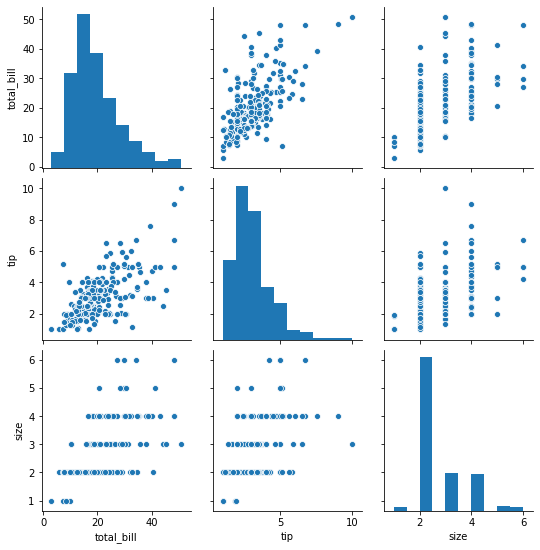

In [0]:
sns.pairplot(tips_data, kind='scatter')

In [0]:
# Creating a new column
tips_data['pct_tip']=tips_data.tip/tips_data.total_bill*100

In [0]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [0]:
# size, the name of the column, need to be changed as it is used 
#in the library for different purpose
tips_data.size.unique()

AttributeError: ignored

In [0]:
# changind the name of the data
tips_data= tips_data.rename(columns={'size':'party'})
tips_data.head(2)

,total_bill,tip,sex,smoker,day,time,party,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159


In [0]:
tips_data.party.unique()

array([2, 3, 4, 1, 6, 5])

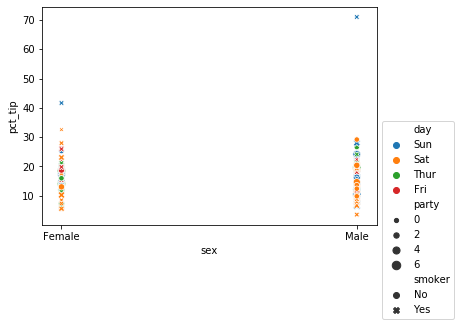

In [0]:
sns.scatterplot(x='sex', y='pct_tip',data=tips_data, 
                size='party', hue='day',style='smoker')
plt.legend(bbox_to_anchor=(1,0.5))

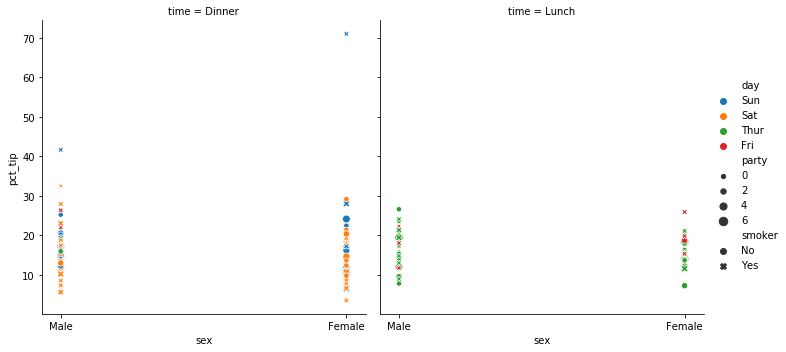

In [0]:
# relationship plot ... 
sns.relplot(x='sex', y='pct_tip',data=tips_data, 
                size='party', hue='day',style='smoker',
            col='time')

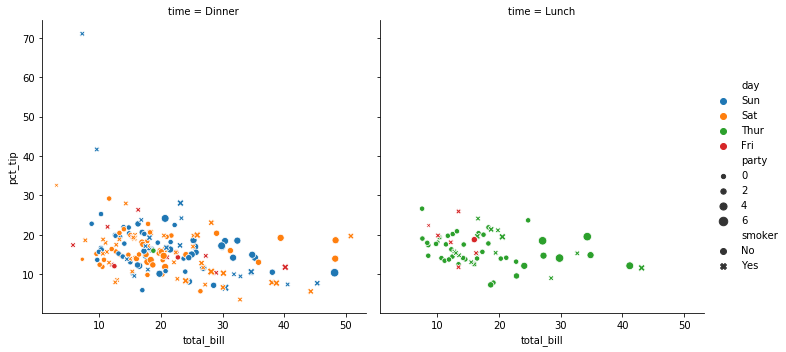

In [0]:
#sns.relplot(..., row="smoker",)
sns.relplot(x='total_bill', y='pct_tip',data=tips_data, 
                size='party', hue='day',style='smoker',
            col='time')

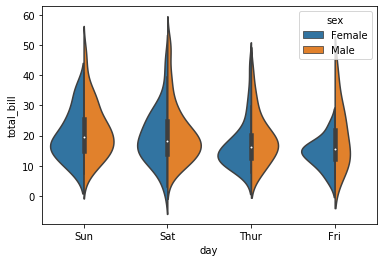

In [0]:
# spliting the violin plot to increase the readability 
sns.violinplot(x='day', y='total_bill', data=tips_data,hue='sex',split=True)

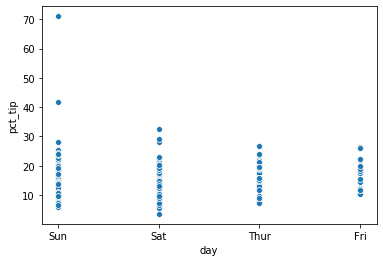

In [0]:
# used to explain the reason of having higher error bars
sns.scatterplot(x='day', y='pct_tip', data=tips_data)

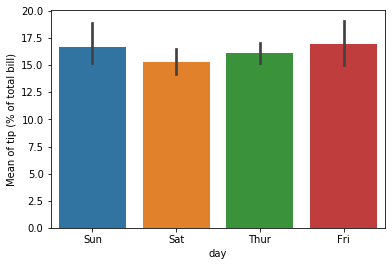

In [0]:
# error bars tells you how confident you are that the mean represents the true value
sns.barplot(x='day', y='pct_tip', data=tips_data)
plt.ylabel('Mean of tip (% of total bill)')
plt.show()

Question? How likely a person would be able to pay tip greater than 15% based on what bill they get

In [0]:
tips_data['large_tip']=tips_data.pct_tip >15
tips_data.head(4)

,total_bill,tip,sex,smoker,day,time,party,pct_tip,large_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,False
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,True
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,True
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,False


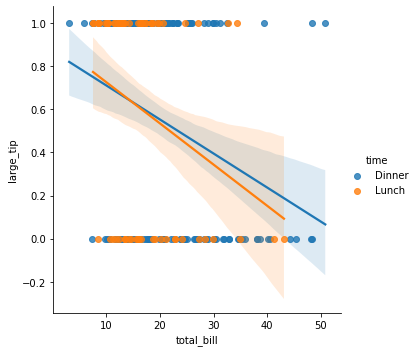

In [0]:
# Plot data and a linear regression model fit... you can also use seaborn.regplot (...)
#https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.lmplot(x='total_bill', y='large_tip', data=tips_data, hue='time')

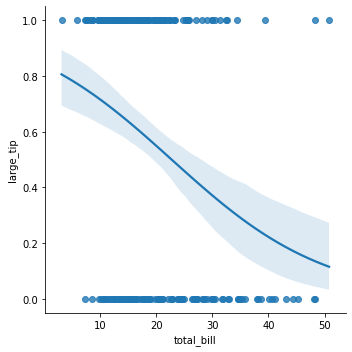

In [0]:
sns.lmplot(x='total_bill', y='large_tip', data=tips_data,logistic=True)

In [0]:
tips_data.pop('large_tip')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,party,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [0]:
from matplotlib import style

In [0]:
style.use('fivethirtyeight')

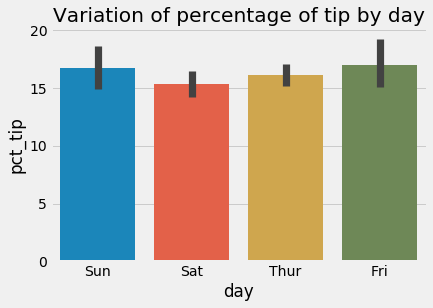

In [0]:
p_fig=sns.barplot(x='day', y='pct_tip', data=tips_data)
plt.title('Variation of percentage of tip by day')
plt.show()

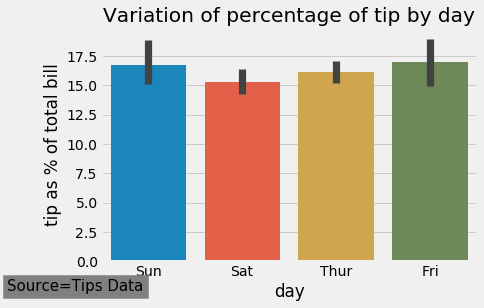

In [0]:
# https://www.dataquest.io/blog/making-538-plots/ 
# check the link above to create graph
p_fig=sns.barplot(x='day', y='pct_tip', data=tips_data)
plt.title('Variation of percentage of tip by day')
plt.ylabel('tip as % of total bill')
p_fig.text(
    x=-1.5,
    y=-2.5,
    s="Source=Tips Data",
    fontsize=15,
    backgroundcolor='grey'
)
plt.show()